In [2]:
import os
import shutil

In [1]:
import os, shutil

original_dataset_dir = 'cat-dog-data/train'

base_dir = 'cat-dog-data/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

def move_imgs(base_fname, start, end, dst_dir):
    fnames = [base_fname+'.{}.jpg'.format(i) for i in range(start, end)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(dst_dir, fname)
        shutil.copyfile(src, dst)

In [4]:
os.mkdir(base_dir)

os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

move_imgs('cat', 0, 1000, train_cats_dir)
move_imgs('cat', 1000, 1500, validation_cats_dir)
move_imgs('cat', 1500, 2000, test_cats_dir)
move_imgs('dog', 0, 1000, train_dogs_dir)
move_imgs('dog', 1000, 1500, validation_dogs_dir)
move_imgs('dog', 1500, 2000, test_dogs_dir)

In [5]:
assert 1000 == len(os.listdir(train_cats_dir))
assert 1000 == len(os.listdir(train_dogs_dir))
assert 500 ==  len(os.listdir(validation_cats_dir))
assert 500 ==  len(os.listdir(validation_dogs_dir))
assert 500 ==  len(os.listdir(test_cats_dir))
assert 500 ==  len(os.listdir(test_dogs_dir))

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
data_batch, labels_batch = next(train_generator)
print(data_batch.shape, labels_batch.shape)

(20, 150, 150, 3) (20,)


In [8]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 9s 91ms/step - loss: 0.6894 - acc: 0.5295 - val_loss: 0.6757 - val_acc: 0.5680
Epoch 2/30
100/100 [==============================] - 4s 44ms/step - loss: 0.6604 - acc: 0.6145 - val_loss: 0.6386 - val_acc: 0.6490
Epoch 3/30
100/100 [==============================] - 4s 44ms/step - loss: 0.6224 - acc: 0.6575 - val_loss: 0.6134 - val_acc: 0.6540
Epoch 4/30
100/100 [==============================] - 4s 44ms/step - loss: 0.5762 - acc: 0.7065 - val_loss: 0.6062 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 4s 44ms/step - loss: 0.5483 - acc: 0.7265 - val_loss: 0.5694 - val_acc: 0.7140
Epoch 6/30
100/100 [==============================] - 4s 43ms/step - loss: 0.5162 - acc: 0.7525 - val_loss: 0.5674 - val_acc: 0.6990
Epoch 7/30
100/100 [==============================] - 4s 44ms/step - loss: 0.4948 - acc: 0.7585 - val_loss: 0.5504 - val_acc: 0.7220
Epoch 8/30
100/100 [=

In [9]:
model.save('cats_and_dogs_small_1.h5')

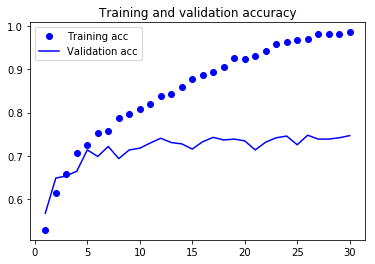

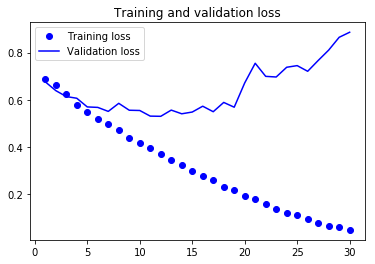

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- Plots show a clear overfitting
    * Validation accuracy stalls
    * Validation loss rapidly reaches its minimum

## Data augmentation

- Technique that augments available data by applying random transformations that creates "new" convincing images
- Effective since your model will never be exposed to two identical inputs
- But limited, because the "new" inputs it sees are only a remix of the original data

In [12]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

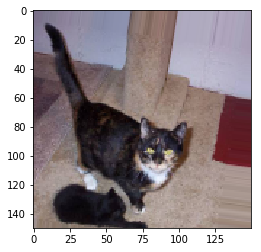

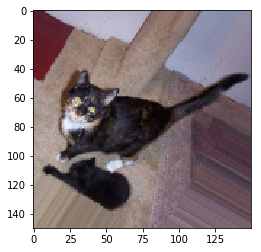

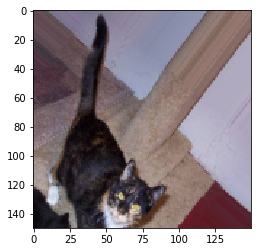

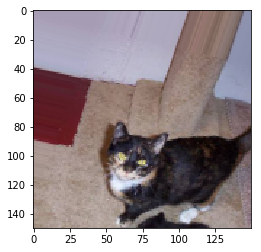

In [13]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [14]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 15s 150ms/step - loss: 0.6916 - acc: 0.5219 - val_loss: 0.6943 - val_acc: 0.4911
Epoch 2/100
100/100 [==============================] - 13s 133ms/step - loss: 0.6770 - acc: 0.5722 - val_loss: 0.6897 - val_acc: 0.5219
Epoch 3/100
100/100 [==============================] - 13s 135ms/step - loss: 0.6617 - acc: 0.5950 - val_loss: 0.6751 - val_acc: 0.5692
Epoch 4/100
100/100 [==============================] - 13s 133ms/step - loss: 0.6525 - acc: 0.6041 - val_loss: 0.6216 - val_acc: 0.6437
Epoch 5/100
100/100 [==============================] - 13s 135ms/step - loss: 0.6279 - acc: 0.6422 - val_loss: 0.5895 - val_acc: 0.6713
Epoch 6/100
100/100 [==============================] - 13s 134ms/step - loss: 0.6206 - acc: 0.6444 - val_loss: 0.5930 - val_acc: 0.6643
Epoch 7/100
100/100 [==============================] - 13s 135ms/step - loss: 0.6045 - acc: 0.6666 -

100/100 [==============================] - 13s 134ms/step - loss: 0.4066 - acc: 0.8147 - val_loss: 0.4663 - val_acc: 0.7944
Epoch 61/100
100/100 [==============================] - 13s 135ms/step - loss: 0.4088 - acc: 0.8147 - val_loss: 0.4571 - val_acc: 0.7784
Epoch 62/100
100/100 [==============================] - 13s 134ms/step - loss: 0.3955 - acc: 0.8166 - val_loss: 0.5053 - val_acc: 0.7881
Epoch 63/100
100/100 [==============================] - 13s 133ms/step - loss: 0.4099 - acc: 0.8172 - val_loss: 0.4641 - val_acc: 0.7964
Epoch 64/100
100/100 [==============================] - 13s 134ms/step - loss: 0.4144 - acc: 0.8075 - val_loss: 0.4628 - val_acc: 0.7957
Epoch 65/100
100/100 [==============================] - 13s 134ms/step - loss: 0.3976 - acc: 0.8172 - val_loss: 0.4715 - val_acc: 0.8020
Epoch 66/100
100/100 [==============================] - 13s 134ms/step - loss: 0.4014 - acc: 0.8166 - val_loss: 0.4196 - val_acc: 0.8131
Epoch 67/100
100/100 [==============================] 

In [16]:
model.save('cats_and_dogs_small_2.h5')

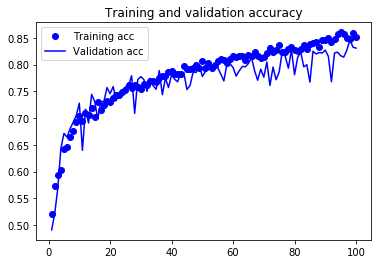

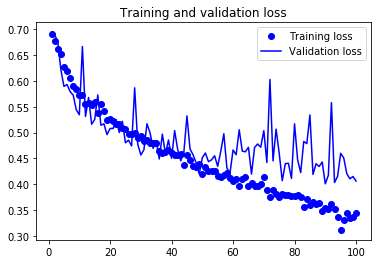

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()